In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import klib as kb

In [14]:
df = pd.read_csv('tv_sales.csv')

In [15]:
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [16]:
print(df.describe())

                TV        Sales
count  4562.000000  4566.000000
mean     54.066857   192.466602
std      26.125054    93.133092
min      10.000000    31.199409
25%      32.000000   112.322882
50%      53.000000   189.231172
75%      77.000000   272.507922
max     100.000000   364.079751


In [17]:
df.isnull().sum()*100

TV       1000
Sales     600
dtype: int64

In [18]:
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

NameError: name 'stats' is not defined

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [22]:
duplicate_rows = df[df.duplicated()]

In [23]:
duplicate_rows

,TV,Sales


In [24]:
df.drop_duplicates(inplace=True)

#### Selecting the features,here only one column

In [34]:
x=df[['TV']].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

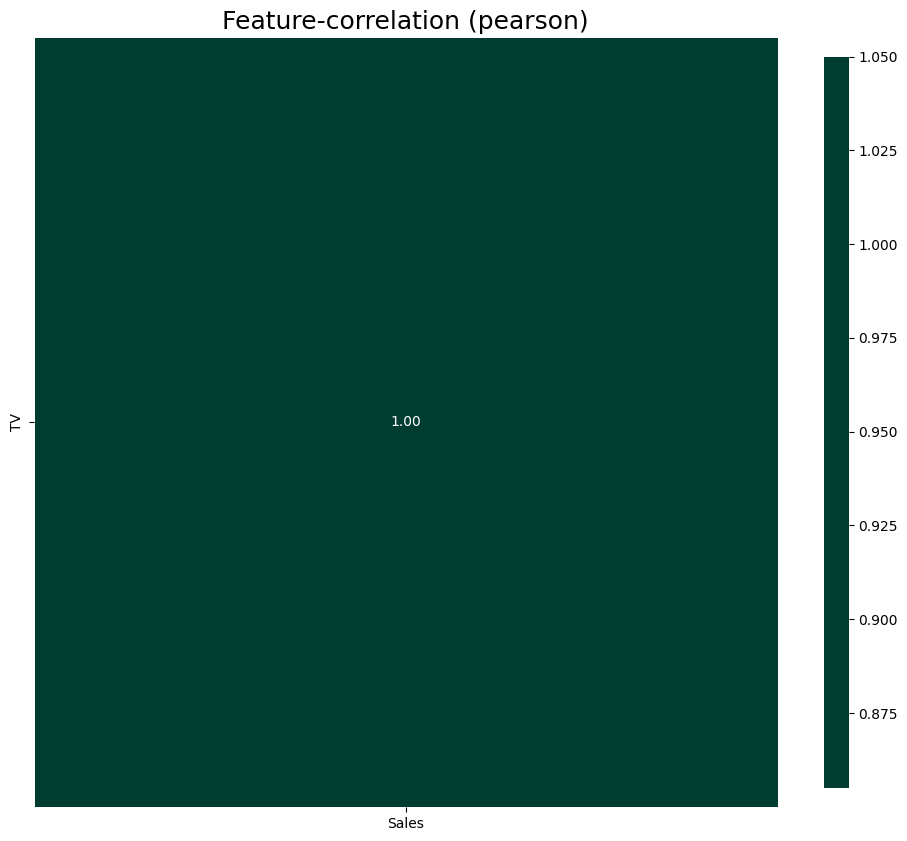

In [29]:
kb.corr_plot(data=df, target='Sales');

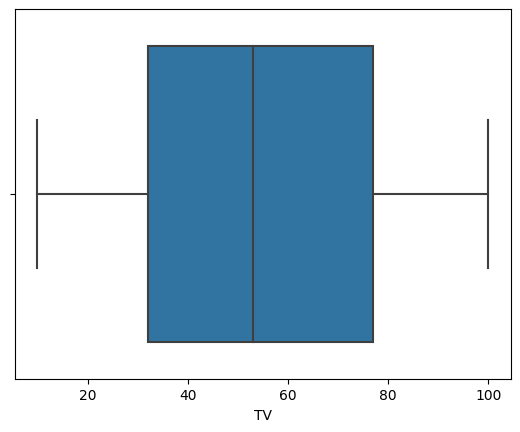

In [31]:
sns.boxplot(x='TV',data=df)
plt.show()

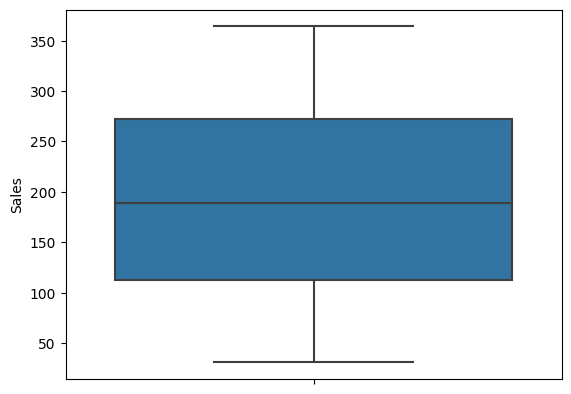

In [33]:
sns.boxplot(y='Sales',data=df)
plt.show()

### selecting th Target column

In [35]:
y=df[['TV']].values

In [36]:
sc= StandardScaler()

In [37]:
x=sc.fit_transform(x)

In [38]:
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [39]:
y

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [56]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=1) ### splitting into training and setting

In [57]:
model = LinearRegression() #model building

In [58]:
model.fit(x_train,y_train) ##fitting

LinearRegression()

In [59]:
model.coef_

array([[26.11408291]])

In [60]:
model.intercept_

array([54.06804214])

In [61]:
training_score = model.score(x_train,y_train)*100 #training
training_score

100.0

In [62]:
testing_score = model.score(x_test,y_test)*100 #testing
testing_score

100.0

In [63]:
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

100.0

In [64]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mae

3.950056656034768e-15

In [65]:
y_pred = model.predict(x) #predicting the values

In [66]:
y_pred

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [67]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,16.0,16.0
1,13.0,13.0
2,41.0,41.0
3,83.0,83.0
4,15.0,15.0


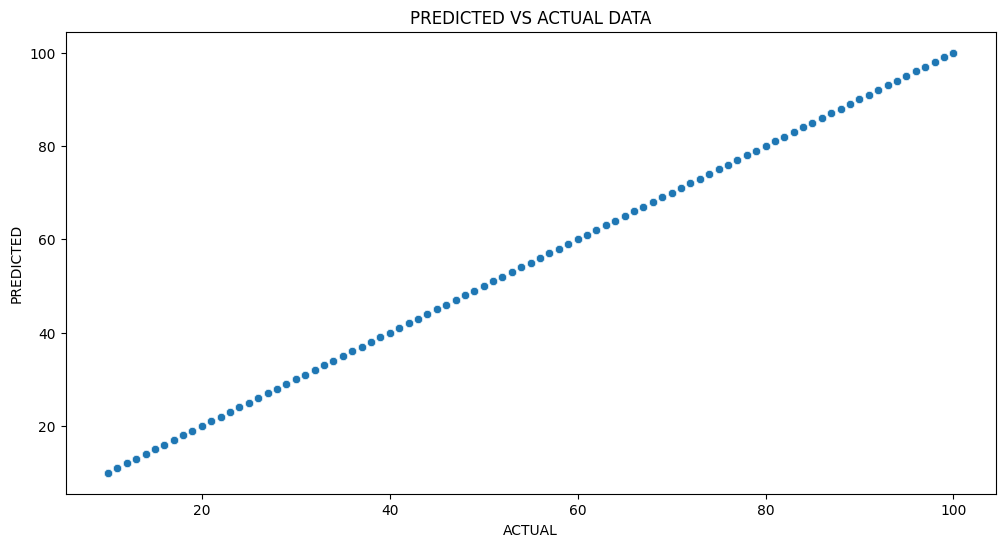

In [68]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

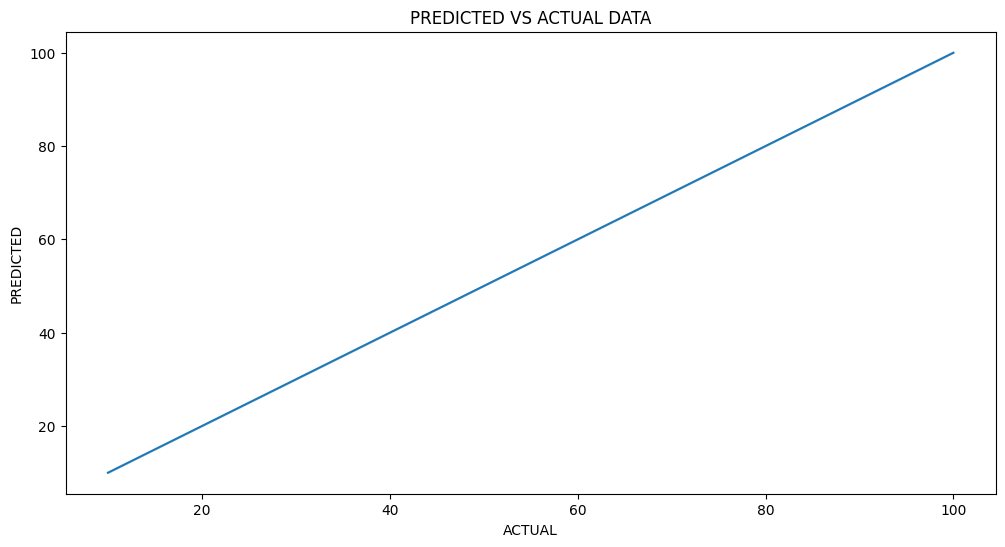

In [69]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");